# Dimensionality Reduction

## Dataset
This notebook uses the famous "Iris" dataset that can be found on the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Iris). It contains measurements for 150 iris flowers from three different species.

## Reading the dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
from matplotlib import pyplot as plt

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',', 
    )
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm', 
                  'sepal width in cm', 
                  'petal length in cm', 
                  'petal width in cm', ))}
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

X = df[[0,1,2,3]].values 
y = df['class label'].values 

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

## PCA

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

Get the explained variance of the different components

In [3]:
print pca.explained_variance_ratio_ * 100

[ 92.46162072   5.30155679   1.71851395]


Get the principal components

In [4]:
print pca.components_

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]


## NMF

In [5]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3)
nmf_result = nmf.fit_transform(X)

Get basis vectors from NMF

In [6]:
print nmf.components_

[[ 6.46399854  1.45989798  4.51284821  0.64722383]
 [ 3.42627836  2.85987979  0.35461187  0.        ]
 [ 0.          5.03187871  7.45733524  7.30702502]]


## LDA

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA
sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = sklearn_lda.fit_transform(X, y)

## Plot all 3 to compare

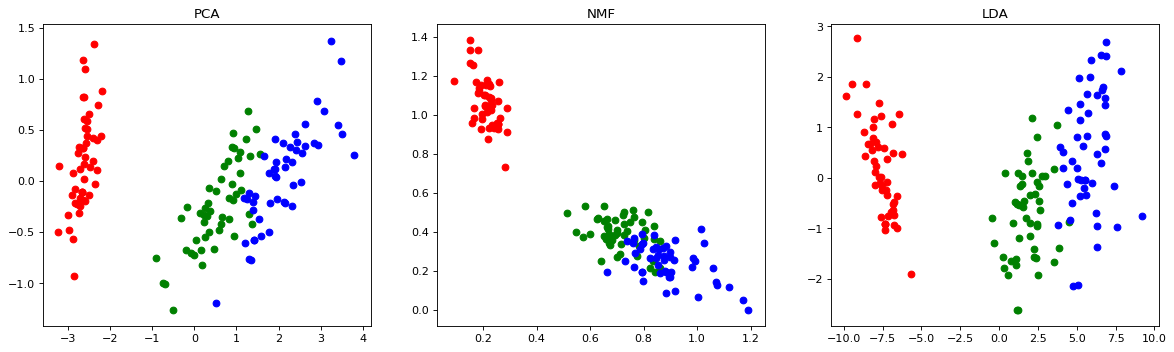

In [8]:
fig=plt.figure(figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,3,1)
plt.scatter(pca_result[y==1, 0], pca_result[y==1, 1], color='r')
plt.scatter(pca_result[y==2, 0], pca_result[y==2, 1], color='g') 
plt.scatter(pca_result[y==3, 0], pca_result[y==3, 1], color='b') 
plt.title('PCA')

plt.subplot(1,3,2)
plt.scatter(nmf_result[y==1, 0], nmf_result[y==1, 1], color='r')
plt.scatter(nmf_result[y==2, 0], nmf_result[y==2, 1], color='g') 
plt.scatter(nmf_result[y==3, 0], nmf_result[y==3, 1], color='b') 
plt.title('NMF')

plt.subplot(1,3,3)
plt.scatter(lda_result[y==1, 0], lda_result[y==1, 1], color='r')
plt.scatter(lda_result[y==2, 0], lda_result[y==2, 1], color='g') 
plt.scatter(lda_result[y==3, 0], lda_result[y==3, 1], color='b') 
plt.title('LDA')

plt.show()